In [12]:
# Kmeans for image compression
# https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

import numpy
import pandas
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
import sys
#clear all variables (from last session)
sys.modules[__name__].__dict__.clear()
import os, sys, time, random, itertools, shutil

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

start = '/content/drive/MyDrive/'
datapath = start + 'data/'

Mounted at /content/drive


In [6]:
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image

url = 'https://upload.wikimedia.org/wikipedia/commons/f/fe/PilatusNearLucernFromAbove.jpg'


In [7]:
  image = io.imread(url)
  image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  cv2_imshow(image_rgb)
  print('\n')

Output hidden; open in https://colab.research.google.com to view.

In [8]:

shape = image_rgb.shape
print(shape)


(2336, 3504, 3)


In [9]:
#data = image_rgb / 255.0   # use 0...1 scale
data = image / 255.0   # use 0...1 scale
data = data.reshape(shape[0]*shape[1], shape[2])
print(data.shape)

(8185344, 3)


In [10]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = numpy.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);


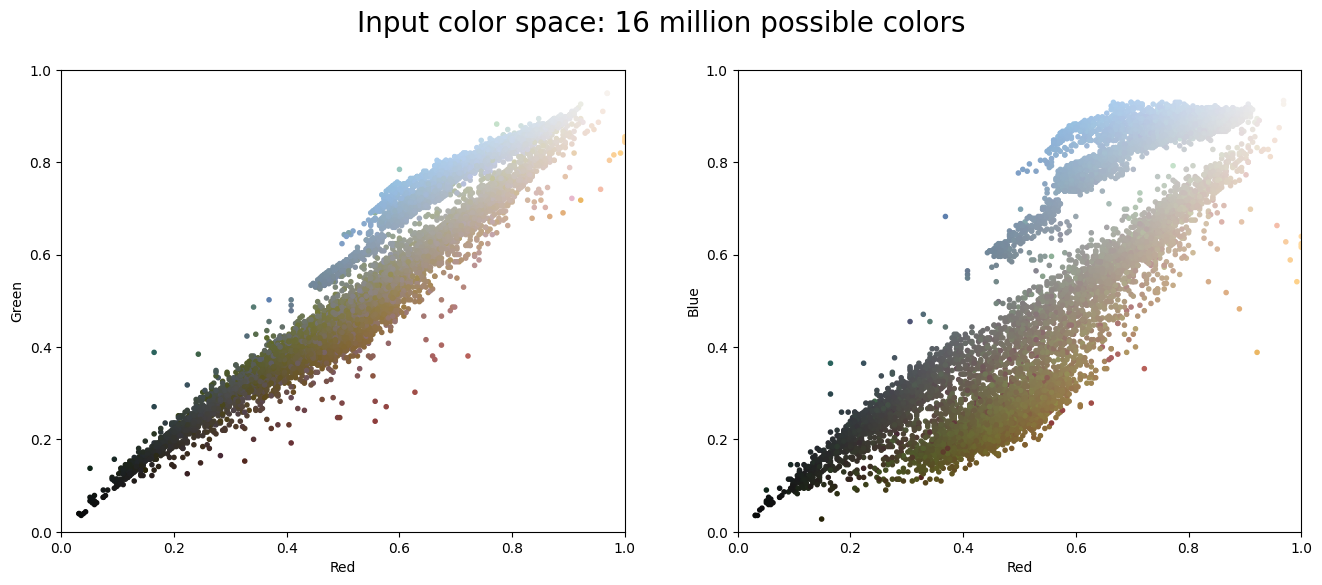

In [13]:
plot_pixels(data, title='Input color space: 16 million possible colors')

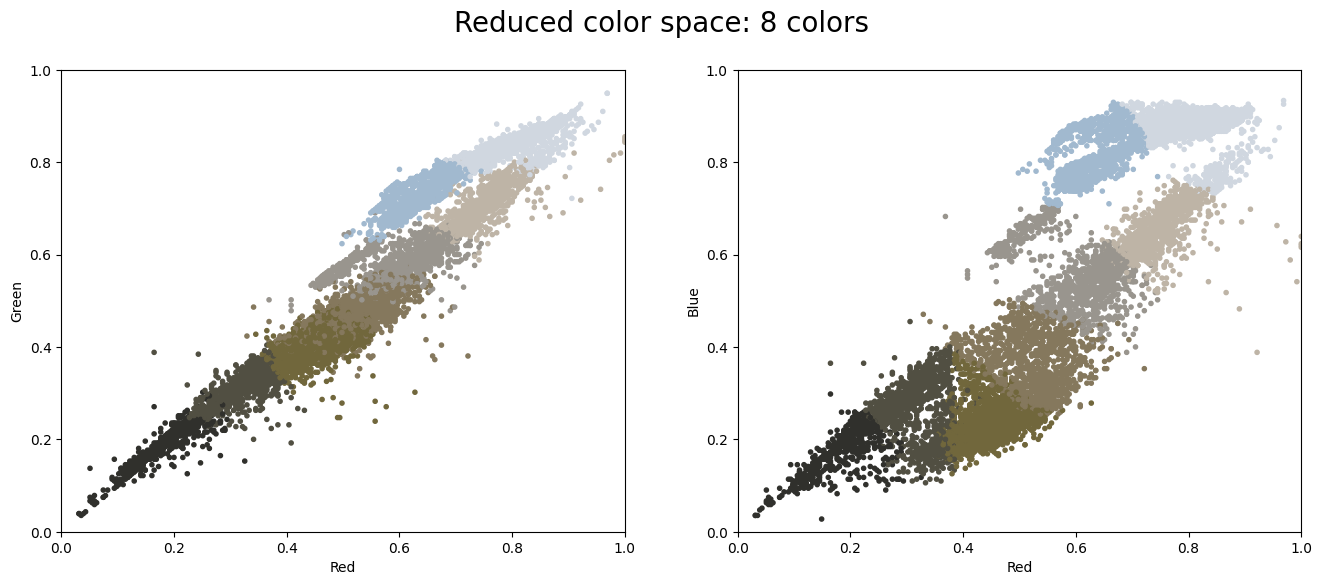

In [14]:
#now lets use only 8 colors
from sklearn.cluster import MiniBatchKMeans

#kmeans = MiniBatchKMeans(8)
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data)

new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 8 colors")

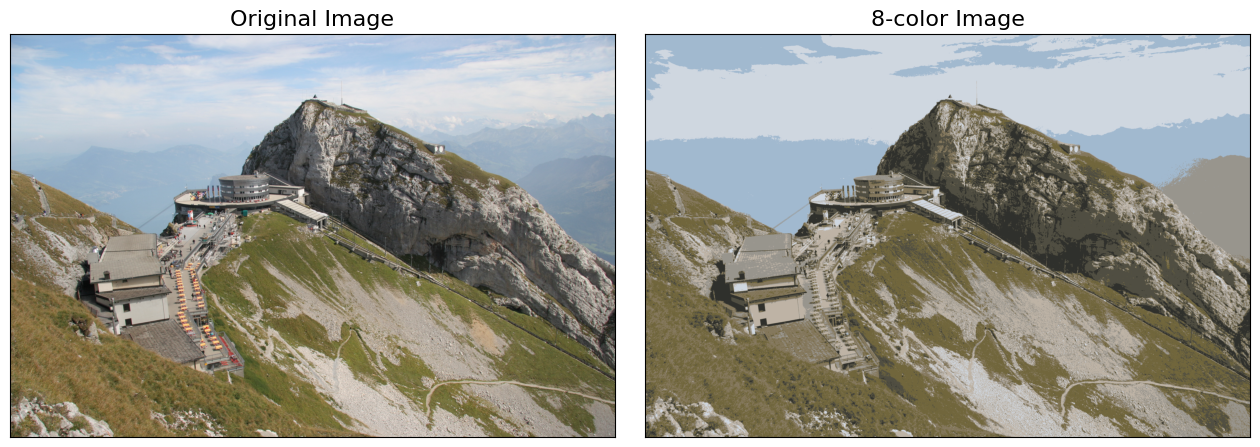

In [15]:
#image_rgb_recolored = new_colors.reshape(image_rgb.shape)
image_rgb_recolored = new_colors.reshape(image.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)

ax[1].imshow(image_rgb_recolored)
ax[1].set_title('8-color Image', size=16);